In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=250)

In [6]:
u_br = np.arange(3,9,1)
u_nr = np.arange(9,11.75,0.25)
u_ar = np.arange(12,26,1)
u = np.hstack((u_br,u_nr,u_ar))

T_stdy = 700
T_ramp = 100
T_sim = T_ramp + T_stdy
T_tot = len(u) * T_stdy + (len(u)-2) * T_ramp
dt = 0.025
t = np.arange(0,T_tot+dt,dt)

cols = ['#Tdat','Vh_ref','Delta','Vz','HLinShr','VShr','VLinShr','VGust']
data = np.zeros((len(t),len(cols)))

data[:,0] = t
data[:,5] = 0.14
for i in range(len(u)):
    n1 = i*int(T_sim//dt)
    n2 = n1 + int(T_stdy//dt)
    n3 = n2 + int(T_ramp//dt)+1

    data[n1:n2,1] = u[i]
    if i < len(u)-1:
        data[n2:n3,1] = u[i] + (u[i+1]-u[i])/T_ramp * np.arange(0,T_ramp,dt)

wnd_df = pd.DataFrame(columns=cols,data=data)
    

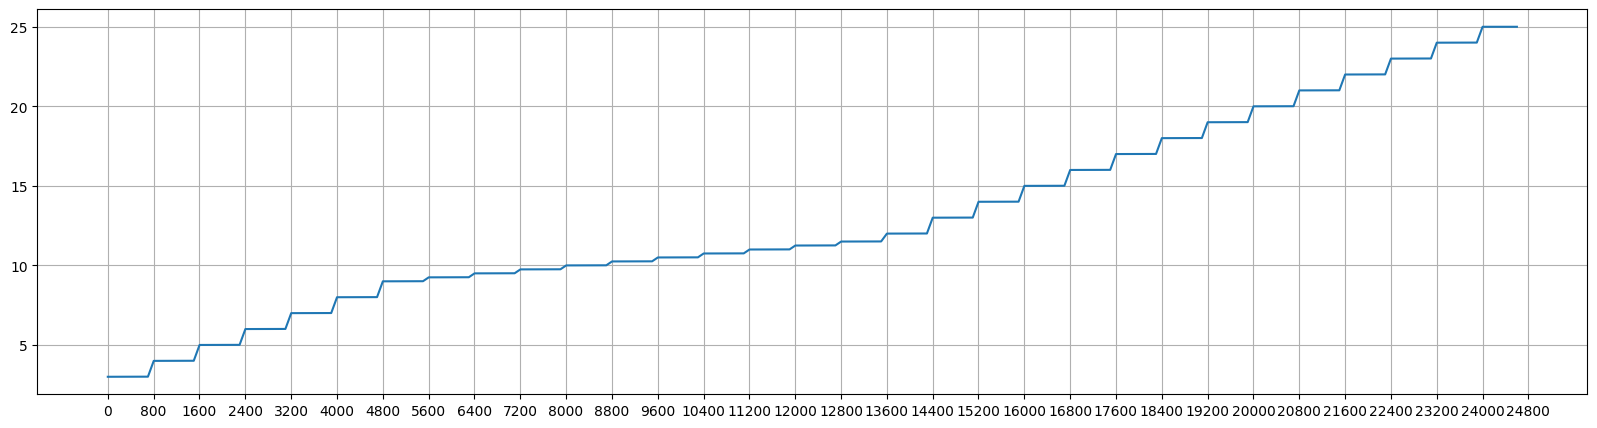

In [7]:
plt.figure(figsize=(20,5))
plt.plot(data[:,0],data[:,1])
plt.xticks(np.arange(0,T_tot+800,800))
plt.grid()

In [8]:
wnd_df.to_csv('StepWind.wnd',index=False)